# **Planes Object Detection - YOLO Model**

# Importing

In [1]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
from keras.preprocessing.image import  load_img
!pip install --upgrade pip
!pip install pandas --upgrade
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

%matplotlib inline


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
Cloning into 'yolov5'...
remote: Enumerating objects: 14461, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 14461 (delta 58), reused 64 (delta 39), pack-reused 14371
Receiving objects: 100% (14461/14461), 13.63 MiB | 25.75 MiB/s, done.
Resolving deltas: 100% (9959/9959), done.
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - \ done
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp37-cp37m-linux_x86_64.whl size=373760 sha256=c3e25ab23752c49e54382b995b1f9a6feda1ee50f6e9a022c9c3c2f1ed86336c
  Stored in directory: /root/.cache/pip/wheels/d0/90/d4/e9ae0a3cdbd8e0cddf6b5fe8c

# Handling Data

In [2]:
img_h, img_w, num_channels = (380, 676, 3)
df = pd.read_csv('/kaggle/input/object-detecion-planes/Object_detection_data/annotations.csv')
image_id_list = list(set(df.image_name))
df.head

<bound method NDFrame.head of          image_name  x1  y1   x2   y2
0    image_0270.jpg  55  27  344  102
1    image_0793.jpg  50  29  341  143
2    image_0656.jpg  49  22  347  111
3    image_0515.jpg  40   7  348  138
4    image_0507.jpg  62  22  339  139
..              ...  ..  ..  ...  ...
795  image_0257.jpg  47  12  346  123
796  image_0623.jpg  54  21  348  105
797  image_0552.jpg  49  26  347  115
798  image_0497.jpg  54  33  349  127
799  image_0570.jpg  55  33  348  132

[800 rows x 5 columns]>

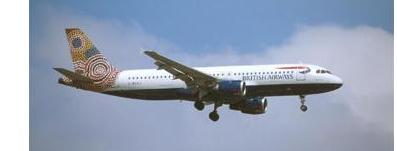

In [3]:
Image(filename=f'/kaggle/input/object-detecion-planes/Object_detection_data/images/{random.choice(image_id_list)}',width=600)

# Yolo Model Predictions

In [4]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source /kaggle/input/object-detecion-planes/Object_detection_data/images
 

detect: weights=['yolov5/yolov5s.pt'], source=/kaggle/input/object-detecion-planes/Object_detection_data/images, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

100%|███████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 133MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/800 /kaggle/input/object-detecion-planes/Object_detection_data/images/image_0001.jpg: 320x704 1 airplane, 10.0ms
image 2/800 

In [5]:
prediected_files_path='yolov5/runs/detect/exp/'
 
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk(prediected_files_path):
    predicted_files.extend(filenames)
   

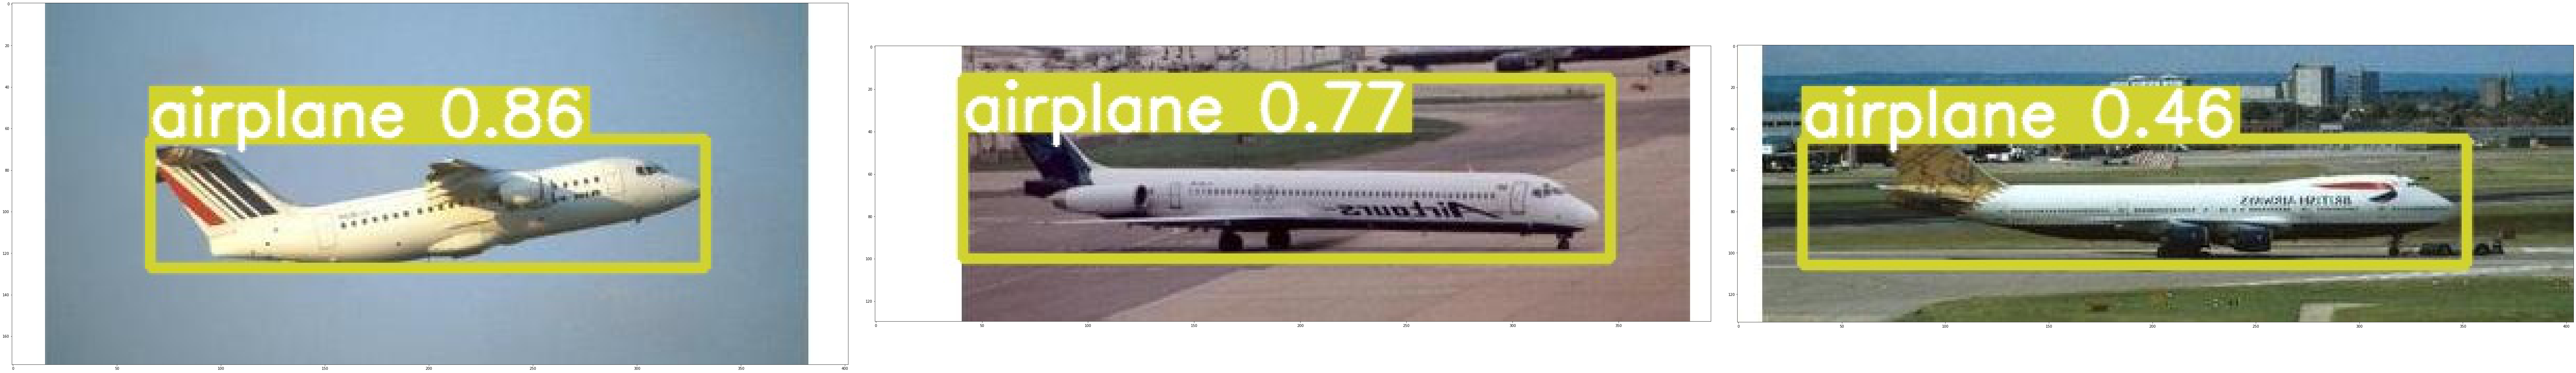

In [6]:
 
fig, axs = plt.subplots(1, 3, figsize=(100, 20), constrained_layout=True)
for i in range(3):
    axs[i].imshow(load_img(f'{prediected_files_path}{random.choice(predicted_files)}'))
 

 


In [7]:
!rm -rf runs yolov5